In [1]:
import numpy as np
import tensorflow as tf
import pickle

In [2]:
from sklearn.utils import shuffle

In [3]:
import matplotlib.pyplot as plt

In [4]:
from tensorflow.contrib.layers import flatten

### Read data

In [5]:
# open existed training set
with open("./data/X_train.p", "rb") as f:
    Xtrain = pickle.load(f)

# open existed training set
with open("./data/y_train.p", "rb") as f:
    ytrain = pickle.load(f)
    
# open existed test set
with open("./data/X_test.p", "rb") as f:
    X_test = pickle.load(f)

Split data set

In [6]:
n_train = 32000
n_validation = 10000

X_train = Xtrain[:n_train]
X_validation = Xtrain[n_train:n_train+n_validation]

y_train = ytrain[:n_train]
y_validation = ytrain[n_train:n_train+n_validation]

In [7]:
X_train.shape

(32000, 784)

In [8]:
X_validation.shape

(10000, 784)

### Pre-processing data

In [9]:
X_train = np.reshape(X_train, (n_train, 28,28,1))
X_validation = np.reshape(X_validation, (n_validation, 28,28,1))

In [10]:
X_test = np.reshape(X_test, (28000, 28,28,1))

In [11]:
X_train = X_train/255
X_validation = X_validation/255

In [12]:
X_test = X_test/255

In [13]:
# # Shuffle the training set
# X_train, y_train = shuffle(X_train, y_train)

In [14]:
y_train.shape

(32000,)

In [15]:
type(y_train[0])

numpy.int32

In [16]:
type(X_train[0])

numpy.ndarray

### Model

In [17]:
28*28

784

In [18]:
# Building CNN Model
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 28x28x1. Output = 24x24x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 24x24x6. Output = 12x12x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 8x8x22.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 22), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(22))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 8x8x22. Output = 4x4x22.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 4x4x22. Output = 352.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 352. Output = 100.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(352, 100), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(100))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 100. Output = 40.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(100, 40), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(40))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 40. Output = 10.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(40, 10), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [19]:
EPOCHS = 10
BATCH_SIZE = 100

In [20]:
x = tf.placeholder(dtype=tf.float32, shape=(None,28,28,1), name="x")
y = tf.placeholder(dtype=tf.int32, shape=(None), name="y")
one_hot_y = tf.one_hot(y,10)

In [21]:
learning_rate = 0.001

In [22]:
logits = LeNet(x)

In [23]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_min(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

In [24]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [25]:
# evaluation
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [26]:
model_folder = "./model"

In [27]:
X_validation.shape

(10000, 28, 28, 1)

In [28]:
y_validation.shape

(10000,)

In [ ]:
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
    
# #     sess.run(logits, feed_dict={x: X_train})
#     sess.run(training_operation, feed_dict={x: X_train, y:y_train})

In [ ]:
X_train.shape

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Start training ...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        loss_summ = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
#             print("from ", offset, "to", end)
#             print(batch_x.shape, batch_y.shape)
            l = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            loss_summ = loss_summ + l
            
        
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("loss:", loss_summ)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, model_folder + "/trained_model.ckpt")
    print("Model saved")

Start training ...

EPOCH 1 ...
Validation Accuracy = 0.105



KeyboardInterrupt: 

In [30]:
X_train.shape

(32000, 28, 28, 1)

In [31]:
test1 = np.reshape(X_train[0], (28,28))

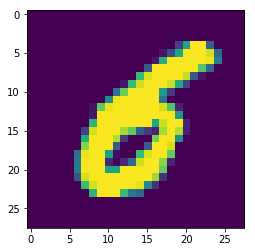

In [32]:
plt.imshow(test1)
plt.show()

In [34]:
xlist = []
xlist.append(X_train[0])

ylist = []
ylist.append(y_train[0])

In [40]:
with tf.Session() as sess:
    # Load trained model
    saver.restore(sess, tf.train.latest_checkpoint("./model"))
    test_logits = sess.run(logits, feed_dict={x: xlist, y: ylist})
    prediction = tf.argmax(test_logits, 1)
    
#     print("predictions", prediction.eval(feed_dict={x: xlist}, session=sess))
#     print("true values",y_web_test)
    print(sess.run(prediction))

INFO:tensorflow:Restoring parameters from ./model\trained_model.ckpt


INFO:tensorflow:Restoring parameters from ./model\trained_model.ckpt


[8]


In [38]:
prediction

<tf.Tensor 'ArgMax_4:0' shape=(1,) dtype=int64>

In [ ]:
x

In [ ]:
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

In [ ]:
# Layer 1: Convolutional. Input = 28x28x1. Output = 24x24x6.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

# Activation.
conv1 = tf.nn.relu(conv1)

In [ ]:
conv1

In [ ]:
# Pooling. Input = 24x24x6. Output = 12x12x6.
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


In [ ]:
conv1

In [ ]:
# Layer 2: Convolutional. Output = 8x8x22.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 22), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(22))
conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

# Activation.
conv2 = tf.nn.relu(conv2)

In [ ]:
conv2

In [ ]:
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
fc0 = flatten(conv2)

In [ ]:
conv2

In [ ]:
# Flatten. Input = 3x3x22. Output = 198.
fc0 = flatten(conv2)

In [ ]:
fc0

In [ ]:
# Layer 3: Fully Connected. Input = 198. Output = 100.
fc1_W = tf.Variable(tf.truncated_normal(shape=(198, 100), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(100))
fc1 = tf.matmul(fc0, fc1_W) + fc1_b

# Activation.
fc1 = tf.nn.relu(fc1)

In [ ]:
fc1